<a href="https://colab.research.google.com/github/vsalahi/PGP-DSBA-UTA/blob/Python-Foundation/Foodhub_project_28Full_Code_29_VahidSalahi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape

(1898, 9)

#### Observations:
Data has 1898 rows and 9 columns 


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* It seems that columns do not have missing values that could be identified by Python. That does not garantee that there is no missing values as we can see from the df.head() that we have some "Not given" input for rating column.
* There are 4 integer columns, 1 float column, and 4 object column.

In [ ]:
df.nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

### Observations:
* "cuisine_type", "day_of_the_week", and "rating" columns have reseanable number of unique values and are suitable for converting to category data type

### **Question 3:**  'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? (Check the info() function) [1 mark]

In [ ]:
# Converting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data

df[['restaurant_name','cuisine_type','day_of_the_week']] = df[['restaurant_name', 
                                                               'cuisine_type','day_of_the_week',]].astype('category')

# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
* It can be noticed that the data memory usage is reduced as the object data type columns converted to the category data type.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
* The min, average, and max of time for food prepration are 20, 27.3,and 35 minutes respectively

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
* 736 of the orders do not have rating

In [ ]:
print(df[-df['rating'].isin(['1','2','3','4','5'])].shape[0], 
      ' number of orders with no rating (another method).')

736  number of orders with no rating (another method).


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]


Below are the functions used during the course to depict distrubution of single numerical variables and count plot for categorical parameters

In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

In [ ]:
# Function to plot a boxplot and a histogram along the same scale. 
# Run this chunk of code to define this function - this will be very useful in data visualisation.
# This function is same as the one used in the Mentorship Case Studies earlier. 

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter", element="bars"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, element="bars"
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# Function to create labeled barplots
# Run this chunk of code to define this function - this will be very useful in data visualisation.
# This function is also same as the one used in the Mentorship Case Studies earlier. 


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Cuisine Type

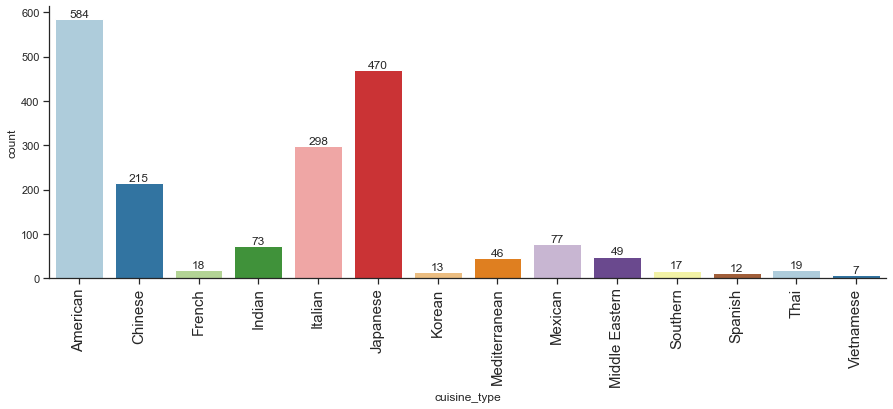

In [ ]:
labeled_barplot(df, 'cuisine_type')

#### Observation:
* American cuisine type has the highest number of orders
* Below is the 5 top cuisie type in a list: 

In [ ]:
print(df['cuisine_type'].value_counts(ascending=False).head(5))

American    584
Japanese    470
Italian     298
Chinese     215
Mexican      77
Name: cuisine_type, dtype: int64


### Cost of Orders

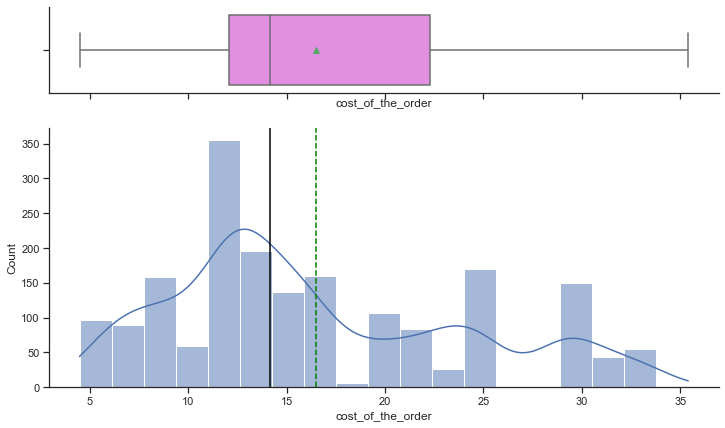

In [ ]:
histogram_boxplot(df, 'cost_of_the_order', kde=True)

#### Observation:
* The histogram plot for the cost of orders shows positive skewness, indicating less-expennsive foods were orderes more frerquently

### Day of Week

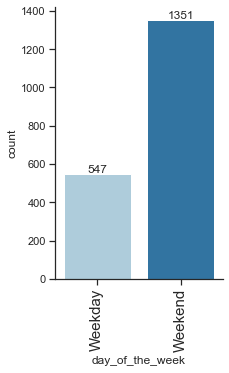

In [ ]:
labeled_barplot(df, 'day_of_the_week')

#### Observation:
* Orders were placed more on the weekends than weekdays (more than twice)

### Rating

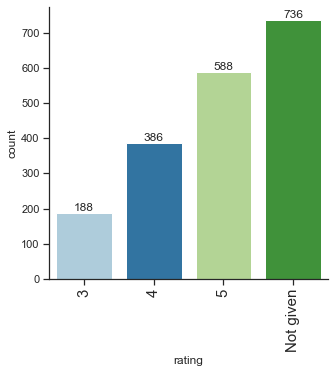

In [ ]:
labeled_barplot(df, 'rating')

#### Observation:
* Many of the orders are not rated, but amoung the rated orders, 5 is the most frequent.
* The average of ratings is calculated below:

In [ ]:
sum=0
n=0
for i in df['rating']:
    try:
        sum += int(i)
        n += 1
    except:
        continue
print("The average of ratings is {0:.2f}".format(sum/n))

The average of ratings is 4.34


### Food Preparation time

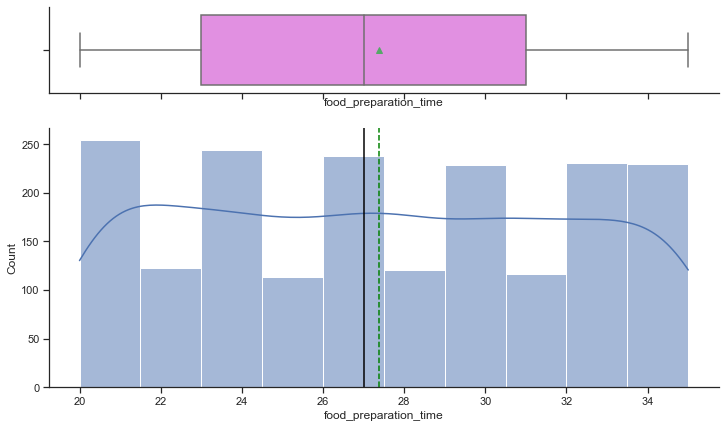

In [ ]:
histogram_boxplot(df, 'food_preparation_time', kde=True, bins=10)

#### Observation:
* The food preparation time shows a uniform distibution which means foods with different times of preparation have about the same number of orders. 

### Delivery Time

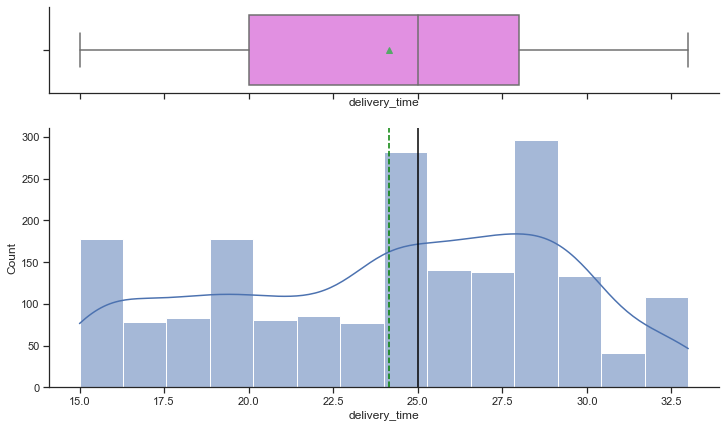

In [ ]:
histogram_boxplot(df, 'delivery_time', kde=True)

#### Observation:
* Similar to the food preparation time, delivery time also have a uniform distibution.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df['restaurant_name'].value_counts(ascending=False).head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
* Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm are the top five resurant with highest number of orders

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
df[df["day_of_the_week"] == 'Weekend']['cuisine_type'].value_counts(ascending=False).head(1)

American    415
Name: cuisine_type, dtype: int64

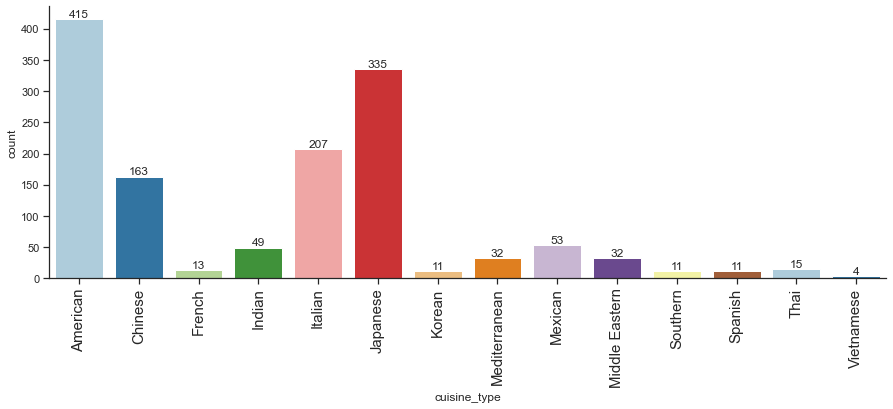

In [ ]:
labeled_barplot(df[df["day_of_the_week"] == 'Weekend'], 'cuisine_type')

#### Observations:
* American cuisines are the most popular cuisines over the weekends.
* As we observed earlier, American cuisines are also the most popular cuisine in general; weekdays and weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
print("~{0:.0f} % of the orders are more than $20".format(100 * df[df['cost_of_the_order'] > 20].shape[0]/df.shape[0]))

~29 % of the orders are more than $20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
print("Average delivery time is about {0:.0f} minutes".format(df['delivery_time'].mean()))

Average delivery time is about 24 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
n=1
for i in df['customer_id'].value_counts(ascending=False).head(5).index:
    print('Customer ID', i, ' with ', df['customer_id'].value_counts()[i], ' number of orders ranked ',n )
    n+= 1
    
# include the exception when there are multiple ids with the same number of orders which are gonna rank the same    

Customer ID 52832  with  13  number of orders ranked  1
Customer ID 47440  with  10  number of orders ranked  2
Customer ID 83287  with  9  number of orders ranked  3
Customer ID 250494  with  8  number of orders ranked  4
Customer ID 65009  with  7  number of orders ranked  5


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

Below correlation between numerical parameters are investigated:

In [ ]:
df.columns
# to get the numerical columns for correlation evaluation

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [ ]:
num_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
df[num_cols].corr()

,cost_of_the_order,food_preparation_time,delivery_time
cost_of_the_order,1.000000,0.041527,-0.029949
food_preparation_time,0.041527,1.000000,0.011094
delivery_time,-0.029949,0.011094,1.000000


<Figure size 1080x504 with 0 Axes>

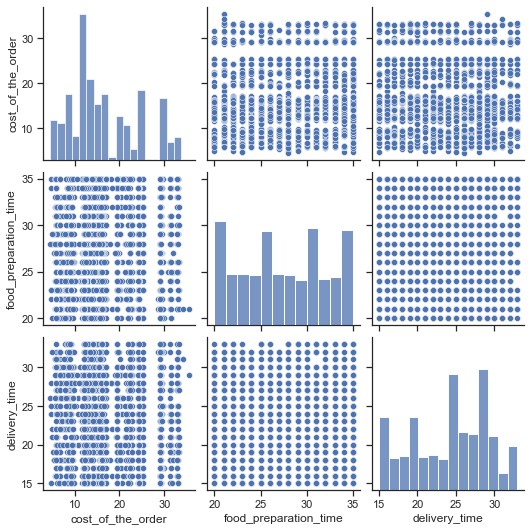

In [ ]:
plt.figure(figsize=(15, 7))
sns.pairplot(df[num_cols])
plt.show()

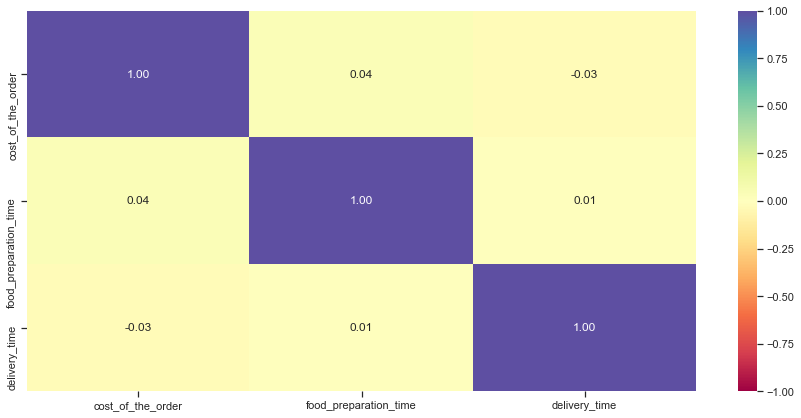

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observation
* There seems to be no correlation between any of the numerical attributes of the dataset.

### Food preparation/Delivery time and cost with respect to Cuisine Type

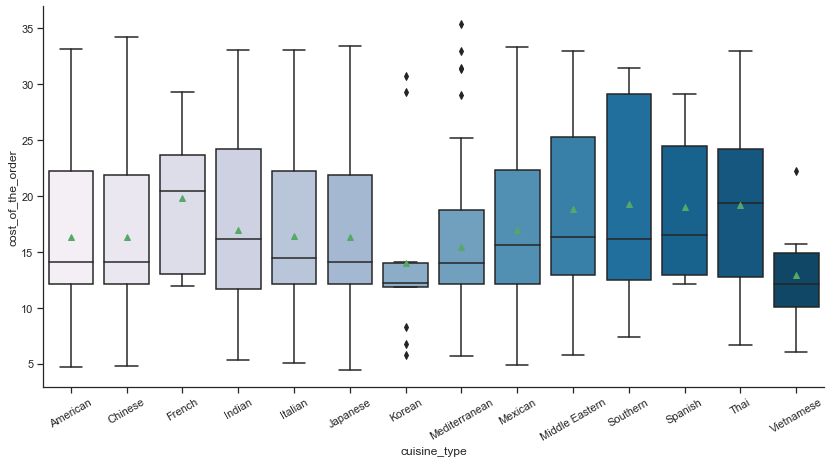

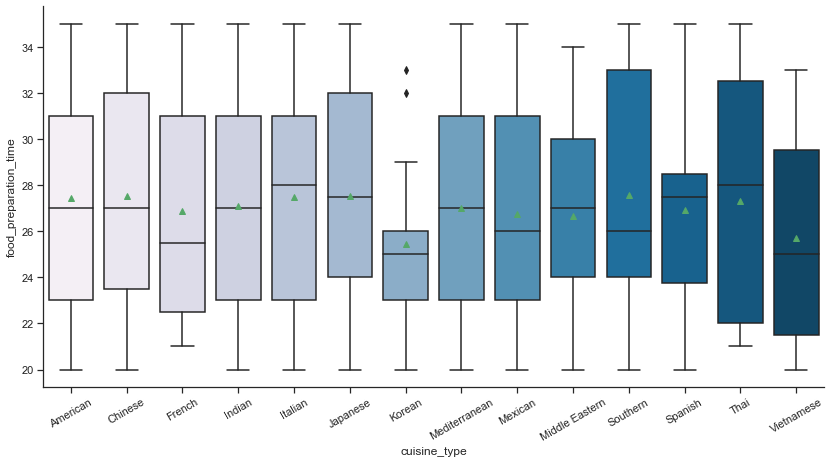

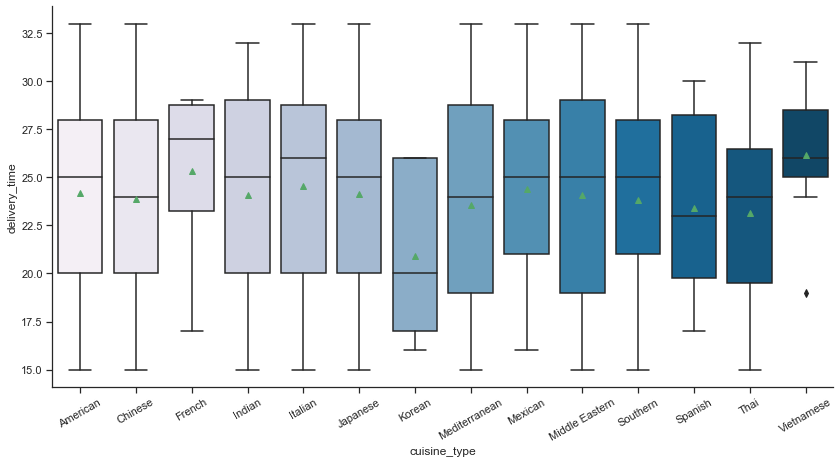

In [ ]:
for i in num_cols:
    plt.figure(figsize=(14,7))
    sns.boxplot(data = df, x = "cuisine_type", y = i , palette = 'PuBu', showmeans=True)
    plt.xticks(rotation = 30)
    plt.show()

#### Observarions:
* Korean cuisines seems to have some outhlier wiht food cost and time of preparation.
* Meditranian cuisines also had some expensive orders.
* French cuisines have the highest average of cost.

### Food preparation/Delivery time and cost with respect to Rating

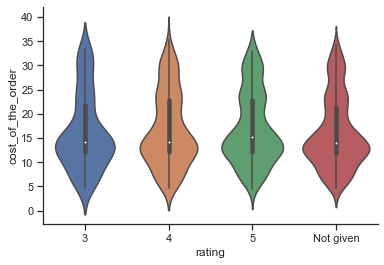

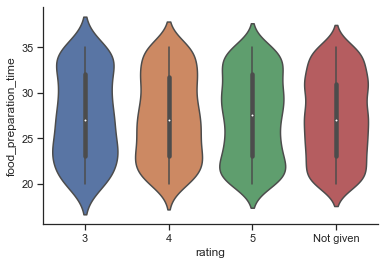

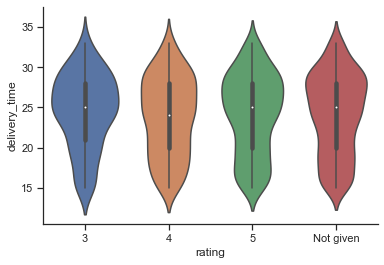

In [ ]:
for i in num_cols:
    sns.violinplot(data = df, x='rating', y=i,order=['3','4','5','Not given']);
    plt.show()

#### Observations:
* Only food cost vs rating shows some skewness towards less-expensive foods for all the rating categories, which only emplied the less-expensive foods were ordered more frequently

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
df_with_rate =  df[df['rating'] != 'Not given'].copy()

df_with_rate['rating'] = df_with_rate['rating'].astype('int')

df_gb = df_with_rate.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index().rename(
    columns={'count':'rating_count','mean':'rating_mean'})

df_gb[(df_gb['rating_count'] > 50) & (df_gb['rating_mean'] > 4)]

,restaurant_name,rating_count,rating_mean
20,Blue Ribbon Fried Chicken,64,4.328125
21,Blue Ribbon Sushi,73,4.219178
136,Shake Shack,133,4.278195
153,The Meatball Shop,84,4.511905


In [ ]:
print('Orders are placed on total number of {} restaurants'.format(df['restaurant_name'].nunique()))

Orders are placed on total number of 178 restaurants


#### Observation:
* Only 4 restaurant out of 178 restaurants meet the conditions for promotional offer.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
revenue = []
for i in range(len(df)):
    if df['cost_of_the_order'][i] > 20:
        revenue.append(df['cost_of_the_order'][i] * 0.25)
    elif df['cost_of_the_order'][i] > 5:
        revenue.append(df['cost_of_the_order'][i] * 0.15)
    else:
        revenue.append(0.0)

df['revenue'] = revenue        
        
print('The net revenue generated by the company is ${} out of {} oders'.format(df['revenue'].sum(),len(df)))

The net revenue generated by the company is $6166.303 out of 1898 oders


#### Observations:
* The total net revenue of about \\$6166 is generated by the company.
* It was assumed that orders with less than \\$5 cost are not charged by the company.

a better way:

In [ ]:
def compute_rev(x):
    if x > 20:
        return x * 0.25
    elif x > 5:
        return x * 0.15
    else:
        return x * 0

    
# df['revenue'] = df['cost_of_the_order'].apply(compute_rev)

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
print("~{0:.0f} % of the orders take more than 60 minutes for preparation and delivery"
      .format(100 * df[df['total_time'] > 60].shape[0]/df.shape[0]))

~11 % of the orders take more than 60 minutes for preparation and delivery


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

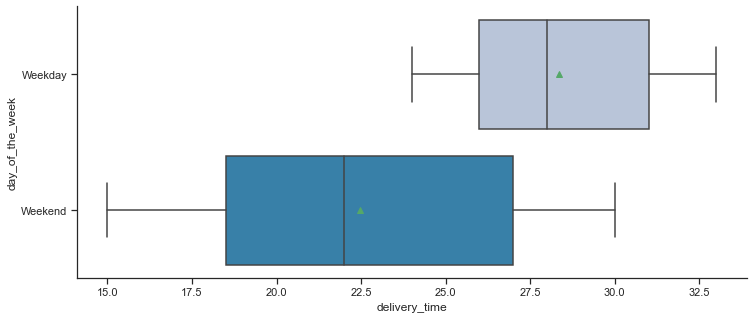

,day_of_the_week,ave_delivery_time
0,Weekday,28.340037
1,Weekend,22.470022


In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(data = df, y = "day_of_the_week", x = 'delivery_time' , showmeans=True, palette = 'PuBu')
plt.show()
df.groupby('day_of_the_week')['delivery_time'].mean().reset_index().rename(columns={'delivery_time':
                                                                                    'ave_delivery_time'})

#### Observations:
* It can be seen that average delivery time ishigher on the weekdays by about 6 minutes
* One reason could be more crowded roadways during the weekdays which can cause longer delivery time 

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [ ]:
df_rating_cuisine = df_with_rate.groupby('cuisine_type')['rating'].agg(
    ['count','mean']).reset_index().sort_values('mean',ascending=False).rename(columns={'count':'rating_count',
                                                                                       'mean':'rating_ave'})
df_rating_cuisine

,cuisine_type,rating_count,rating_ave
11,Spanish,6,4.833333
12,Thai,9,4.666667
3,Indian,50,4.540000
8,Mexican,48,4.416667
5,Japanese,273,4.373626
4,Italian,172,4.360465
1,Chinese,133,4.338346
10,Southern,13,4.307692
2,French,10,4.300000
0,American,368,4.298913


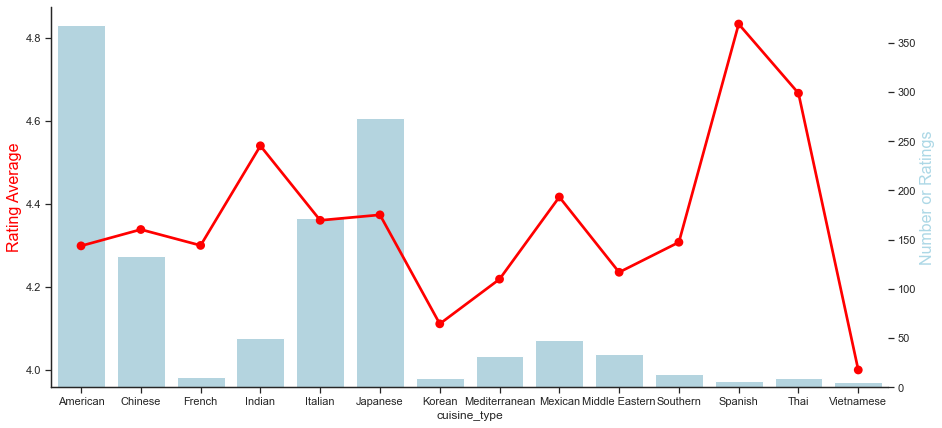

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,7))
#line plot
ax1 = sns.pointplot(x="cuisine_type", y="rating_ave", data = df_rating_cuisine, sort=True, color='red')
ax1.set_ylabel('Rating Average', fontsize=16, color='red')
#sharing the same x-axis
ax2 = ax1.twinx()
#bar plot
ax2 = sns.barplot(x="cuisine_type", y="rating_count", data = df_rating_cuisine, color='lightblue')
ax2.set_ylabel('Number or Ratings', fontsize=16, color='lightblue')
ax1.set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax1.patch.set_visible(False)  # prevents ax1 from hiding ax2
plt.show()

#### Observation
* American restaurants have the most number of ratings.
* Spanish restaurants have the highest average rating out of 6 ratings.
* Cuisines with low total count of ratings are less popular and could be a good option for more advertiement